# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [27]:
import math
import sys

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
# import sklearn

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [29]:
wine = pd.read_csv("wine-quality-red.tsv", sep="\t")
wine.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
615,9.6,0.600,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5
1104,8.0,0.480,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,6
126,8.2,1.330,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
1240,7.5,0.610,0.20,1.7,0.076,36.0,60.0,0.99494,3.10,0.40,9.3,5
240,8.9,0.635,0.37,1.7,0.263,5.0,62.0,0.99710,3.00,1.09,9.3,5
523,9.3,0.400,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4,5
755,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6


In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

I downloaded the PMLB version of the Wine Quality - Red dataset. From the `info` and `isna` functions it looks like there are no empty rows or missing data. 

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [32]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

This dataset is a collection of physicochemical properties of red wines grown in the Vinho Verdes region in north west Portugal. These property measurements were taken to predict the quality ranking of the wine on a scale of 1 to 10. 

1. fixed acidity: $tartaric$ $acid$ $(g)$ / $dm^3$ - The concentration of fixed acids, measured by tartaric acid. Other fixed acids may include malic, citric, and succinic. Contributes to the tartness and sourness of the wine.
2. volatile acidity: $acetic$ $acid$ $(g)$ / $dm^3$ - The concentration of volatile acids, measured by acetic acid. Acetic acid (vinegar) is largely considered a waste product and creates a pungent, sour taste in the wine. 
3. citric acid: $g/dm^3$ - A specific kind of fixed acid that contributes a fruity or citrus flavor. 
4. residual sugar: $g/dm^3$ - Sugar left over in the wine. During the fermentation process, yeast breaks down the sugars into energy, alcohols, and other byproducts.
5. chlorides: $sodium$ $chloride$ $(g)$ / $dm^3$ - Concentration of chlorides measured by sodium chloride, or salt. 
6. free sulfur dioxide: $mg/dm^3$ - Amount of sulfur dioxide (SO2) present in wine ready to neutralize bacteria and microbes. SO2 is both a natural byproduct of the fermentation process and added by winemakers as a preservative. 
7. total sulfur dioxide: $mg/dm^3$ - Amount of sulfur dioxide (SO2) present in wine. Some SO2 is already bound to other compounds in the wine. The balance between oxygen and SO2 allows for some to bind and some to be "free" in the wine. 
8. density: $g/cm^3$ - The thickness of the wine. Higher or lower densities change the mouthfeel of the wine. 
9. pH: $unitless$ - Overall acidity. pH is the measurement of free hydrogen ions present in the mixture. A healthy pH level allows the chemical properties of wine to operate and contributes a pleasant acidic taste. 
10. sulphates: $potassium$ $sulphate$ $(g)$ / $dm^3$ - Potassium sulphate (K2SO4) is not usually included in wine. This may refer to potassium metabisulphate (K2S2O5) which is an added preservative. 
11. alcohol: $\%$ $volume$ - Fraction of alcohol by volume.
12. target: $unitless$ - Quality score of the wine on a scale of 1 to 10. 

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [33]:
wine_inputs = wine.drop(columns="target")
wine_target = wine["target"]

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From checking out the mean and range of these columns, it looks like density does not vary much at all compared to the other columns. Free and total sulfur dioxide are different units (mg instead of g) so they have a significantly larger range, standard deviation, and mean than the other columns. Without normalizing the columns, these variations may occupy the model with explaining their variation instead of explaining the target's variation. 

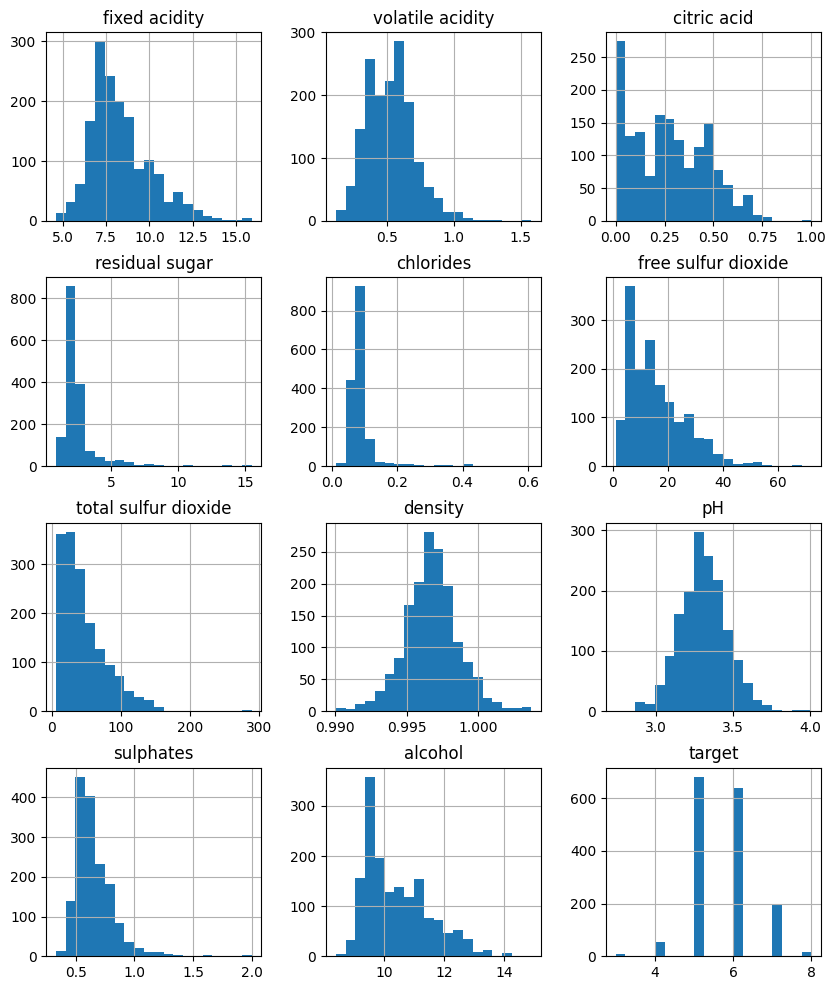

In [34]:
wine.hist(bins=20, figsize=(10, 12))
None

Most columns are relatively normal or skew left. There are a significant number of low-middle ranked wines, however I'm curious what just plotting the 7-8 range wines would show. 

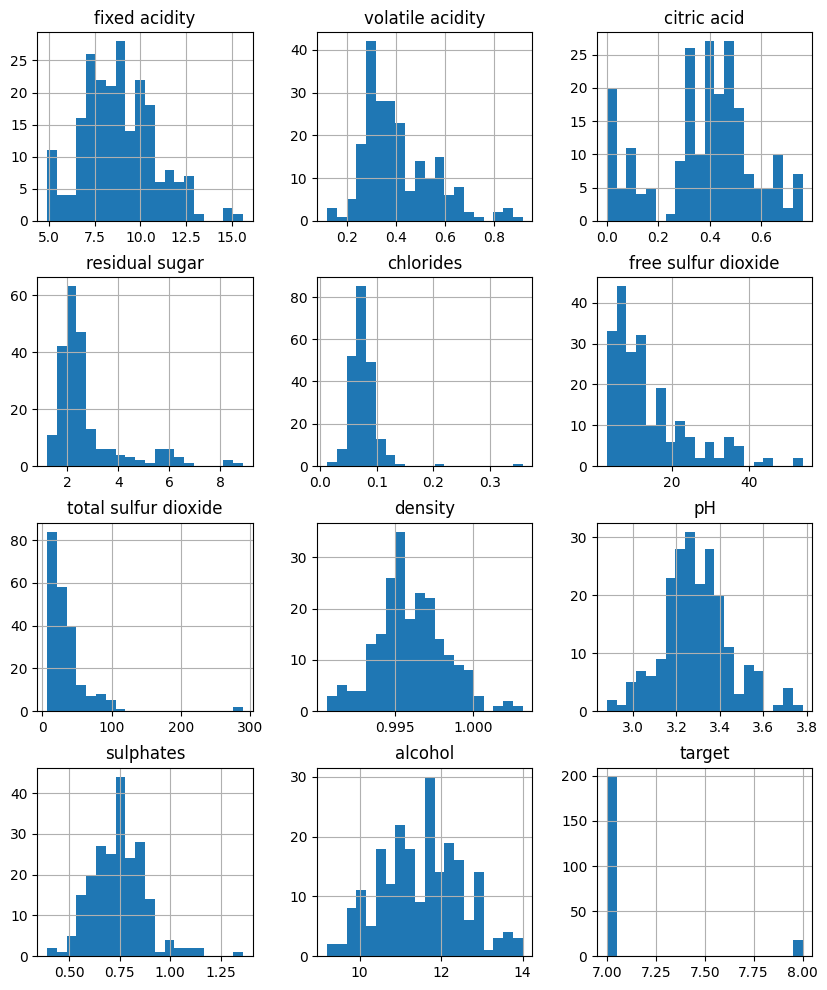

In [35]:
wine.query("target > 6").hist(bins=20, figsize=(10, 12))
None

I'm not sure what I was expecting. Maybe looking at a colored scatter matrix would help.

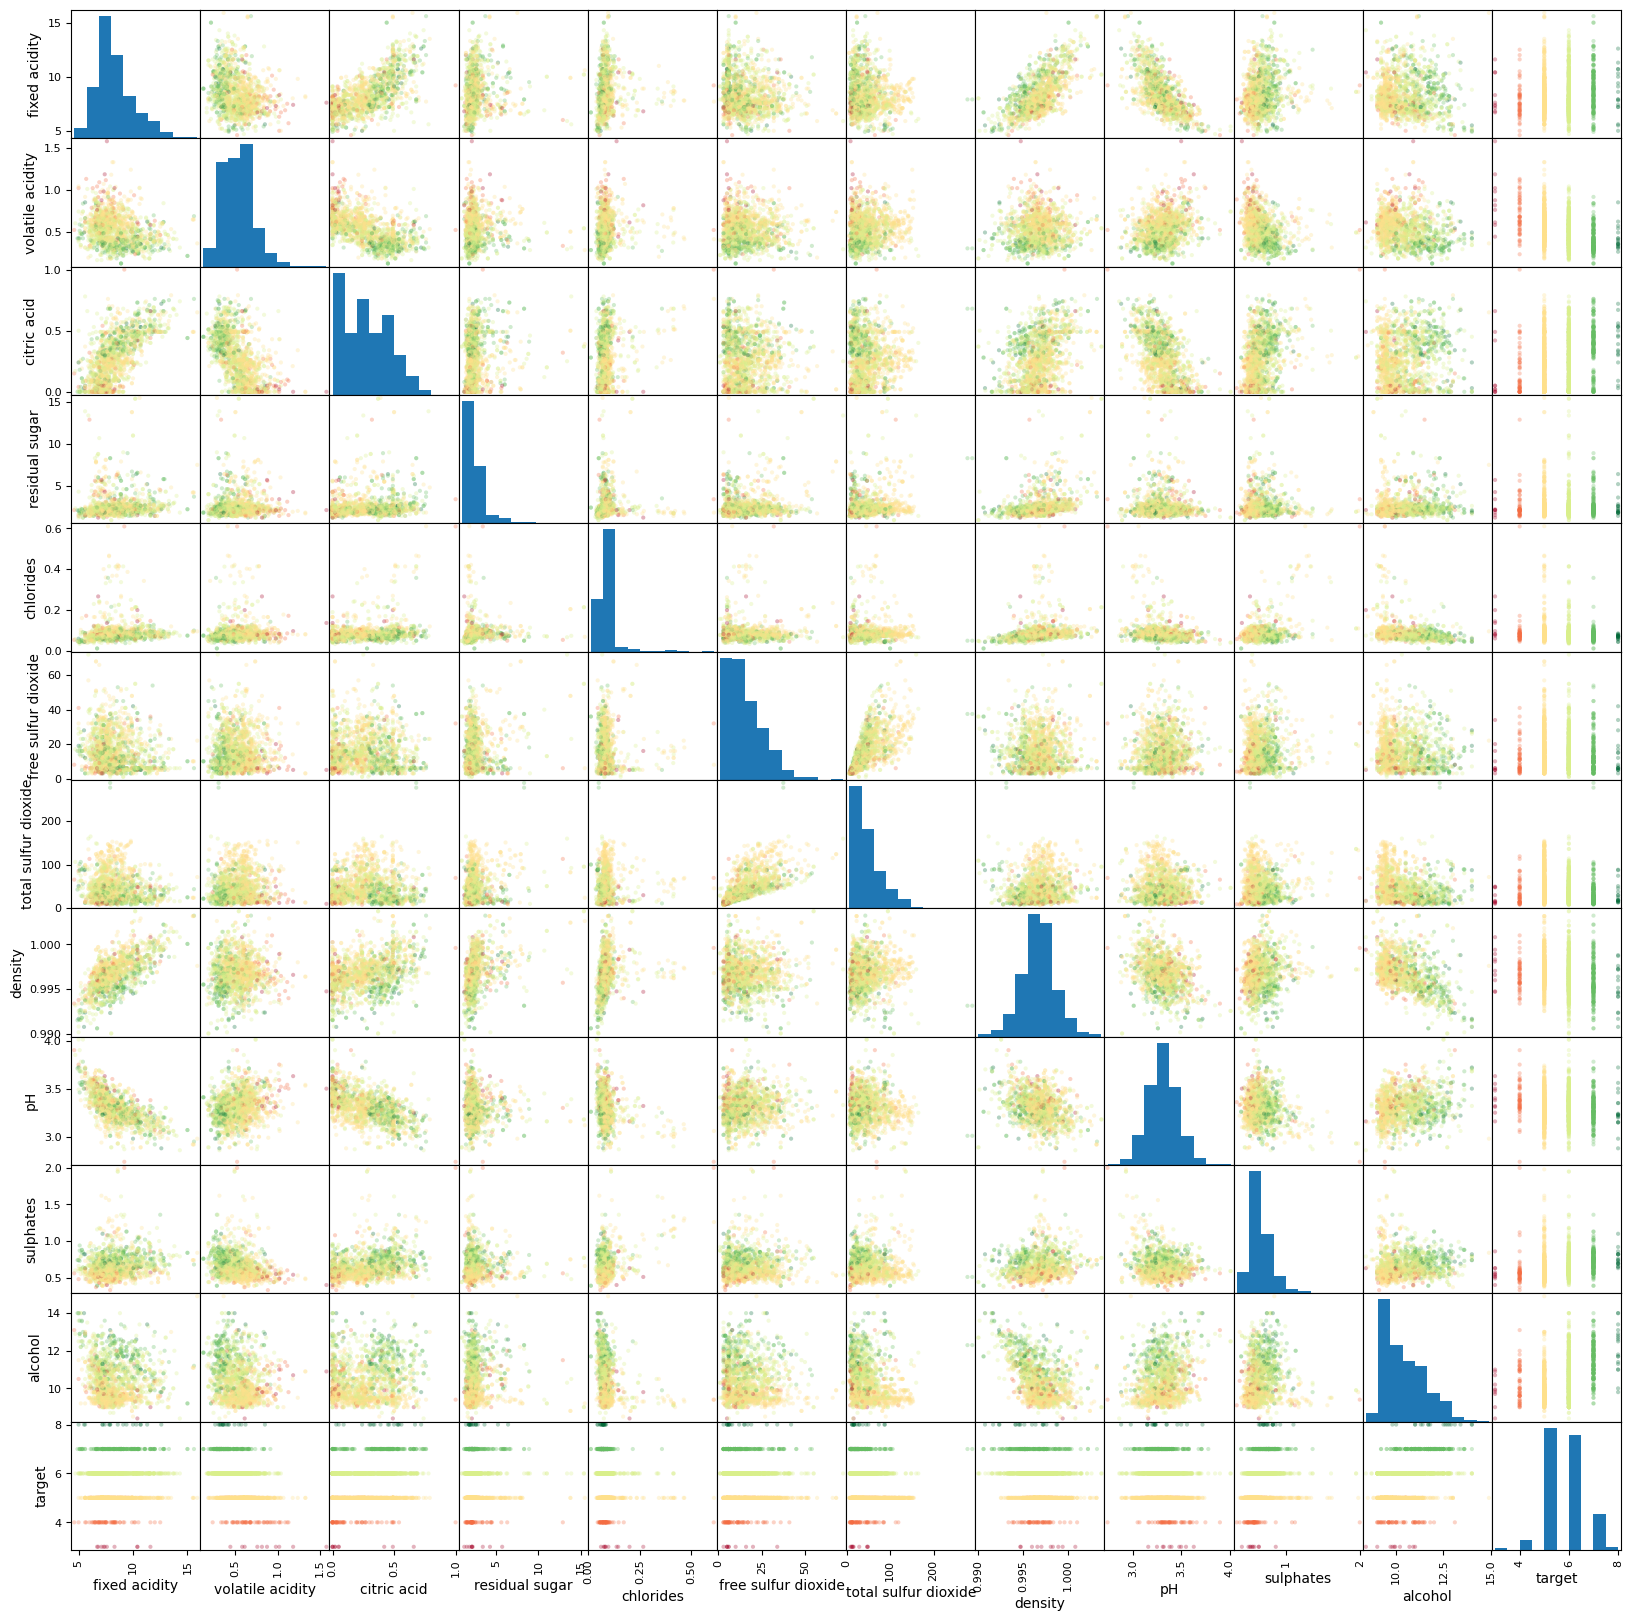

In [36]:
pd.plotting.scatter_matrix(wine, alpha=0.3, figsize=(20, 20), c=wine_target.astype('category').cat.codes, cmap="RdYlGn")
None

With the target column results as colors, we can see that for many columns there are clear trends in rating. For example, higher alcohol content wines tend to rate higher when paired with every other column. Some relationships show obvious correlation such as total acidity, fixed acidity, citric acid, and pH which are all causally related. 

Some interesting correlations are density and fixed acidity, density and alcohol, and citric acid and volatile acidity.

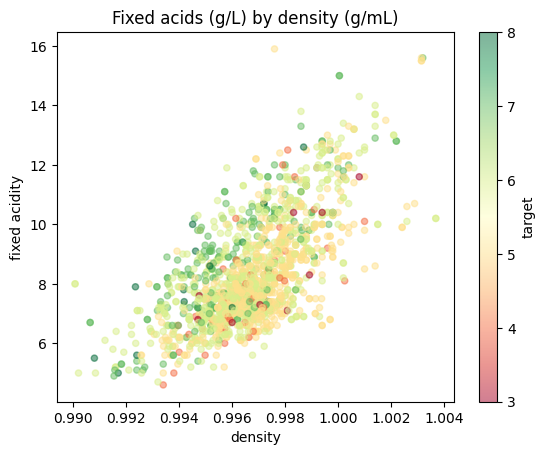

In [37]:
wine.plot.scatter(x="density", y="fixed acidity", alpha=0.5, c="target", cmap="RdYlGn", title="Fixed acids (g/L) by density (g/mL)")
None

The positive correlation between fixed acidity and density is quite interesting because there is no obvious causal relationship between these chemical properties, meaning there may be a relationship here only understood by winemakers. Additionally, there seems to be a transition between lower and higher quality wines somewhere along the center diagonal of the cluster, possibly indicating some "golden ratio". 

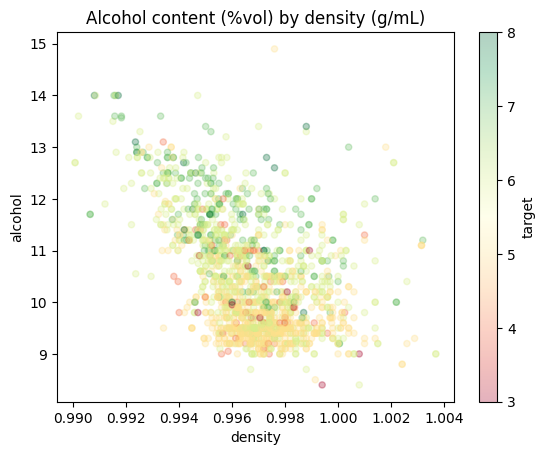

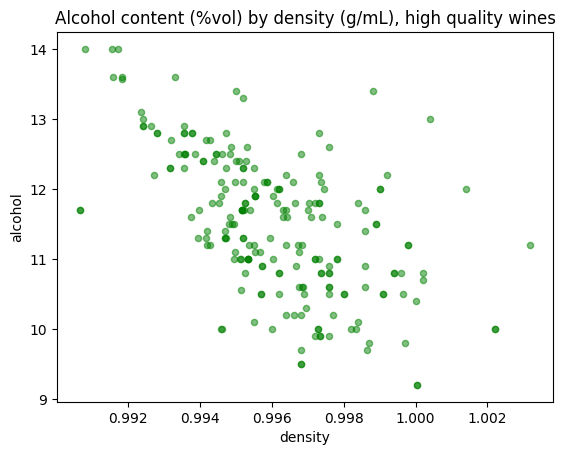

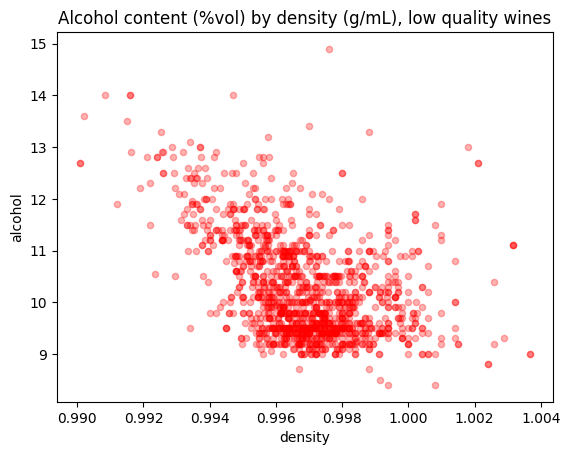

In [38]:
wine.plot.scatter(x="density", y="alcohol", alpha=0.3, c="target", cmap="RdYlGn", title="Alcohol content (%vol) by density (g/mL)")
wine.query("target >= 7").plot.scatter(x="density", y="alcohol", alpha=0.5, color="green", title="Alcohol content (%vol) by density (g/mL), high quality wines")
wine.query("target < 7").plot.scatter(x="density", y="alcohol", alpha=0.3, color="red", title="Alcohol content (%vol) by density (g/mL), low quality wines")
plt.show()

Alcohol content and density may have a weak negative correlation. But what I found most interesting about this plot is how spread the higher quality wines were along a higher alcohol level. To see if the trend held, I made graphs of just the higher and lower quality wines separately to compare distributions. While higher quality wines seemed more spread, the majority of lower quality wines are bunched in a middle-density, low-alcohol zone. 

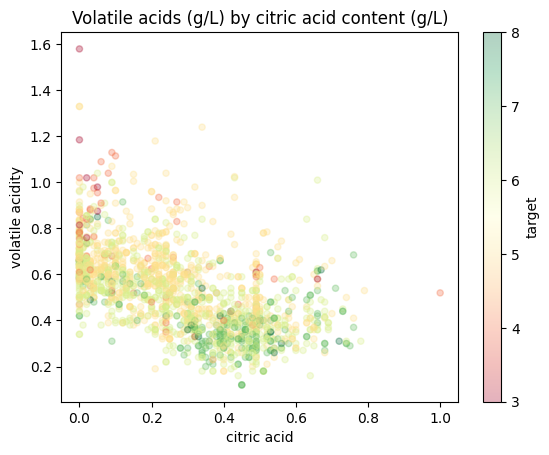

In [39]:
wine.plot.scatter(x="citric acid", y="volatile acidity", alpha=0.3, c="target", cmap="RdYlGn", title="Volatile acids (g/L) by citric acid content (g/L)")
None

This plot shows the relationship between two strong taste contributors: acetic acid (volatile acid, or vinegar) and citric acid. Unsuprisingly, we can see that a higher concentration of volatile acids leads to lower quality wine (e.g. spoiled-tasting). Citric acid adds a fruity, aromatic flavor to the wine and may even mask the volatile acidity. The largest bunch of low-quality wines coincides with little to no citric acid to help cut the bitter taste of vinegar. 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [40]:
wine_inputs.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Highest pairs:
1. Fixed acidity & citric acid = 0.67
2. Fixed acidity & density = 0.69
3. Fixed acidity & pH = -0.68
4. Citric acid & pH = -0.54
5. Free sulfur dioxide & total sulfur dioxide = 0.67

These are all unsuprising as they relate to each other causally, except for fixed acidity & density as I discussed earlier. The correlations with pH are negative because a lower pH value indicates higher acidity.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

**LinearRegression**

- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Description: https://www.codecademy.com/article/linear-regression-with-scikit-learn-a-step-by-step-guide-using-python 

**GradientBoostingRegressor**

- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- Description: https://codepointtech.com/how-to-fit-gradientboostingregressor-in-scikit-learn/

**HuberRegressor**

- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html
- Description: https://medium.com/@algostalk/huber-regression-a-smarter-approach-to-handle-outliers-in-machine-learning-7be42ef07cdd


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

c:\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


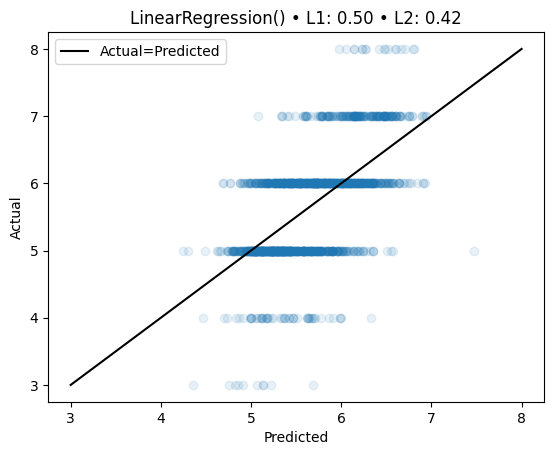

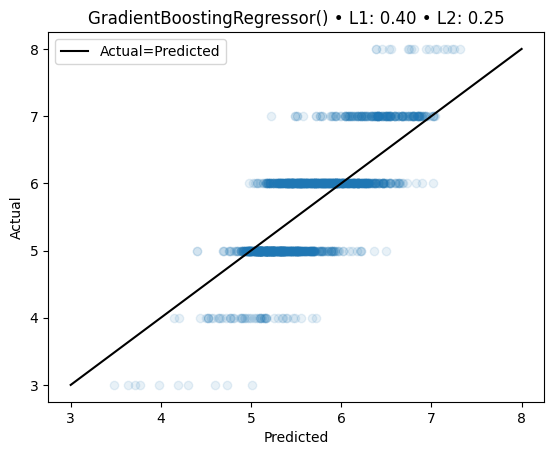

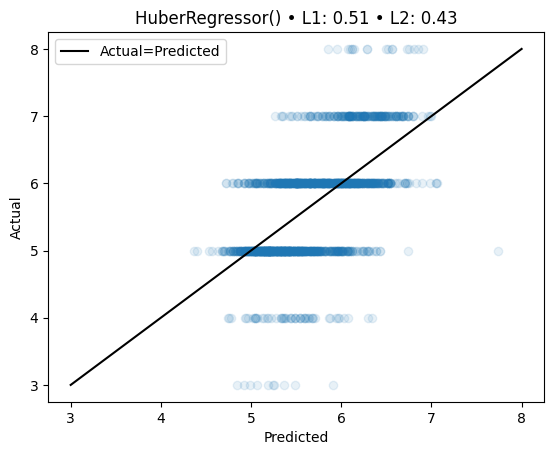

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor

def build_pred_plot_models(models: list, X_train, y_train, X_test, y_test):
    """Builds the list of models and evaluates them with the test set. Generates a plot of the actual vs. predicted for each model."""
    trained = [model().fit(X_train, y_train) for model in models]
    preds = [model.predict(X_test) for model in trained]

    for model, pred in zip(trained, preds):
        plt.plot([3, 8], [3, 8], label="Actual=Predicted", color="black")
        plt.scatter(pred, y_test, alpha=0.1)
        plt.title(f"{model.__class__()} • L1: {mean_absolute_error(y_test, pred):.2f} • L2: {mean_squared_error(y_test, pred):.2f}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.legend()
        plt.show()

regression_models = [LinearRegression, GradientBoostingRegressor, HuberRegressor]
build_pred_plot_models(regression_models, wine_inputs, wine_target, wine_inputs, wine_target)

These three regressors did similar things to minimize loss. Linear regression minimizes ordinary least squares in the training set. Huber regression calculates parameters using the L1 and L2 loss in an attempt to minimize the effects of outliers on ordinary linear regression. Gradient boosted regression uses multiple sequential models to handle and reduce the L2 loss of each previous model. 

We can see that the Huber model isn't working any better than the ordinary linear model out-of-the-box. However, the model hyperparameters can likely be modified to get a better output. The gradient boosted regressor did the best job minimizing both the L1 and L2 loss functions. 

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [42]:
from sklearn.model_selection import cross_validate

cv_scores = [cross_validate(model(), wine_inputs, wine_target, scoring=["neg_mean_squared_error"]) for model in regression_models]

for score in cv_scores:
    score["test_neg_mean_squared_error"] = score["test_neg_mean_squared_error"].mean() * -1 # scoring negates the error, so we need to change it back to positive

cv_scores

c:\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: l

[{'fit_time': array([0.00336003, 0.0023036 , 0.00180125, 0.0018146 , 0.0018189 ]),
  'score_time': array([0.00121498, 0.00095129, 0.00092649, 0.00090957, 0.00090408]),
  'test_neg_mean_squared_error': np.float64(0.4366293880320983)},
 {'fit_time': array([0.20975399, 0.19515252, 0.18896413, 0.19131804, 0.18717742]),
  'score_time': array([0.00146222, 0.00148797, 0.00145769, 0.00147247, 0.00144362]),
  'test_neg_mean_squared_error': np.float64(0.4194131417387402)},
 {'fit_time': array([0.04553437, 0.05856013, 0.04947495, 0.03894877, 0.03742933]),
  'score_time': array([0.00124717, 0.00203395, 0.0011344 , 0.00110745, 0.00111771]),
  'test_neg_mean_squared_error': np.float64(0.44705875443815996)}]

L2 loss comparisons

|Model  |Whole dataset  |Cross validation   |
|-------|------|--------|
|LinearRegression   |0.42   |0.44  |
|GradientBoostingRegressor   |0.25   |0.42   |
|HuberRegressor   |0.43   |0.45 |

Cross validation seems to produce slightly worse L2 loss compared to just validating with the whole training set, which is expected due to overfitting. The biggest gap is in the gradient boosting regressor which optimized out the training set more radically, but would likely fail a real test set.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

normalized_models = [
    make_pipeline(StandardScaler(), model()).fit(wine_inputs, wine_target) for model in regression_models
]
normalized_mse = [mean_squared_error(wine_target, model.predict(wine_inputs)) for model in normalized_models]
print("L2 loss using pipeline:", normalized_mse)

L2 loss using pipeline: [0.416767167221408, 0.25438114655319366, 0.4188214200719246]


The L2 loss after using the pipeline is exactly the same as what we predicted in problem 6 for each model! 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

Trying this would just be overfitting the training dataset by finding the one-in-a-thousand hyperparameter that happens to lower the loss function very well for the training set, but wont generalize to the test set.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

Selected top model: `GradientBoostingRegressor`

Of the 3 models evaluated today, the GradientBoostingRegressor performed the best in problems 6, 7, and 8 by lowering its L2 loss the most. Additionally, in problem 6, the L1 loss was the lowest in comparison to the LinearRegression model and the HuberRegressor. 

In the wine dataset, we saw a mixture of correlations and dependencies between features. These interactions are based in chemistry and other physical laws that may not easily map to linear relationships, which both the LinearRegression and HuberRegressor models primarily use to model their targets. Gradient boosting allows the model to adapt first to major principal components and prominent relationships to the target wine quality, while then tailoring the remaining error with further improvements in cases of non-linear relationships. 